In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the datasets
stock_info = pd.read_csv('TCS_stock_info.csv')
stock_history = pd.read_csv('TCS_stock_history.csv')
stock_action = pd.read_csv('TCS_stock_action.csv')


In [8]:
# Display basic information about each dataset
print("\n--- TCS Stock Info Dataset ---")
print(f"Shape: {stock_info.shape}")
print("First few rows:")
print(stock_info.head())
print("\nColumns and data types:")
print(stock_info.dtypes)
print("\nSummary statistics:")
print(stock_info.describe())

print("\n--- TCS Stock History Dataset ---")
print(f"Shape: {stock_history.shape}")
print("First few rows:")
print(stock_history.head())
print("\nColumns and data types:")
print(stock_history.dtypes)
print("\nSummary statistics:")
print(stock_history.describe())

print("\n--- TCS Stock Action Dataset ---")
print(f"Shape: {stock_action.shape}")
print("First few rows:")
print(stock_action.head())
print("\nColumns and data types:")
print(stock_action.dtypes)
print("\nSummary statistics:")
print(stock_action.describe())


--- TCS Stock Info Dataset ---
Shape: (150, 2)
First few rows:
                   zip                                             400001
0               sector                                         Technology
1    fullTimeEmployees                                             509058
2  longBusinessSummary  Tata Consultancy Services Limited provides inf...
3                 city                                             Mumbai
4                phone                                    91 22 6778 9999

Columns and data types:
zip       object
400001    object
dtype: object

Summary statistics:
           zip 400001
count      150    108
unique     150     96
top     sector   3805
freq         1      4

--- TCS Stock History Dataset ---
Shape: (4463, 8)
First few rows:
         Date       Open       High        Low      Close  Volume  Dividends  \
0  2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
1  2002-08-13  29.556316  30.030333  28.905705  29.119476  1

In [9]:
# Check for missing values in each dataset
print("\nMissing values in Stock Info dataset:")
print(stock_info.isnull().sum())
print("\nMissing values in Stock History dataset:")
print(stock_history.isnull().sum())
print("\nMissing values in Stock Action dataset:")
print(stock_action.isnull().sum())

# Check for duplicates in each dataset
print("\nDuplicates in Stock Info dataset:", stock_info.duplicated().sum())
print("Duplicates in Stock History dataset:", stock_history.duplicated().sum())
print("Duplicates in Stock Action dataset:", stock_action.duplicated().sum())



Missing values in Stock Info dataset:
zip        0
400001    42
dtype: int64

Missing values in Stock History dataset:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Missing values in Stock Action dataset:
Date            0
Dividends       0
Stock Splits    0
dtype: int64

Duplicates in Stock Info dataset: 0
Duplicates in Stock History dataset: 0
Duplicates in Stock Action dataset: 0


In [10]:
# Convert Date column to datetime format in stock_history dataset
stock_history_copy = stock_history.copy()
stock_history_copy['Date'] = pd.to_datetime(stock_history_copy['Date'])
print("\nDate range in Stock History dataset:")
print(f"First date: {stock_history_copy['Date'].min()}")
print(f"Last date: {stock_history_copy['Date'].max()}")
print(f"Number of days: {(stock_history_copy['Date'].max() - stock_history_copy['Date'].min()).days}")

# Display summary of available data and analysis scope
print("\n--- Data Analysis Scope ---")
print(f"We have TCS stock history from {stock_history_copy['Date'].min().strftime('%Y-%m-%d')} to {stock_history_copy['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total trading days available: {stock_history_copy.shape[0]}")
print(f"Stock information variables: {', '.join(stock_info.columns.tolist())}")
print(f"Stock history variables: {', '.join(stock_history.columns.tolist())}")
print(f"Stock action variables: {', '.join(stock_action.columns.tolist())}")


Date range in Stock History dataset:
First date: 2002-08-12 00:00:00
Last date: 2021-09-30 00:00:00
Number of days: 6989

--- Data Analysis Scope ---
We have TCS stock history from 2002-08-12 to 2021-09-30
Total trading days available: 4463
Stock information variables: zip, 400001
Stock history variables: Date, Open, High, Low, Close, Volume, Dividends, Stock Splits
Stock action variables: Date, Dividends, Stock Splits


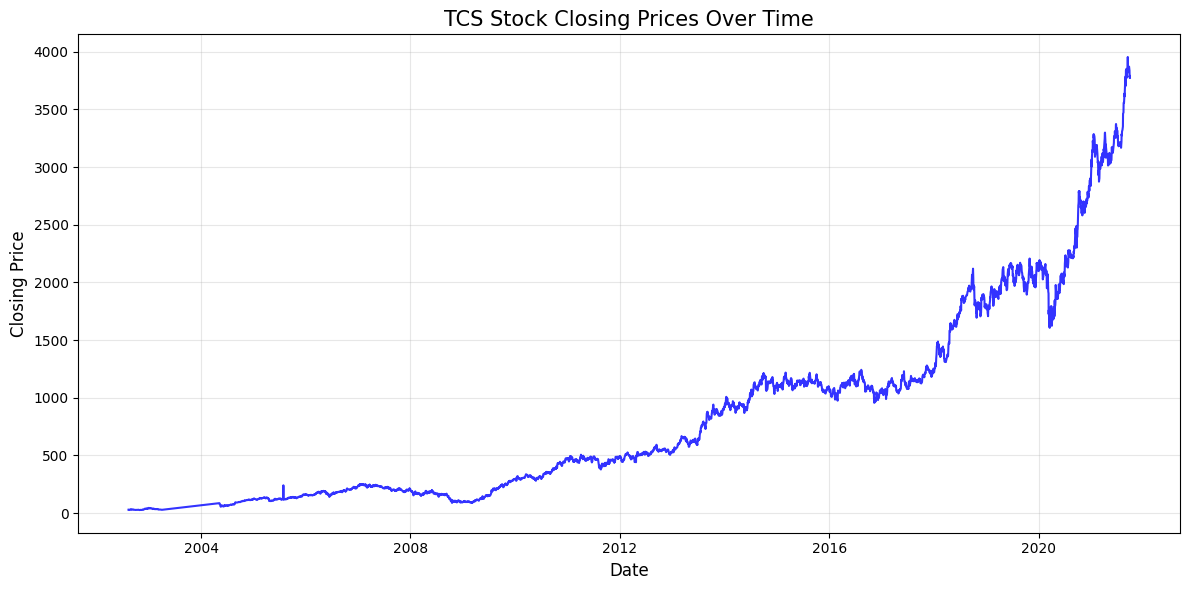

In [11]:
# Plot a quick preview of the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_history_copy['Date'], stock_history_copy['Close'], color='blue', alpha=0.8)
plt.title('TCS Stock Closing Prices Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

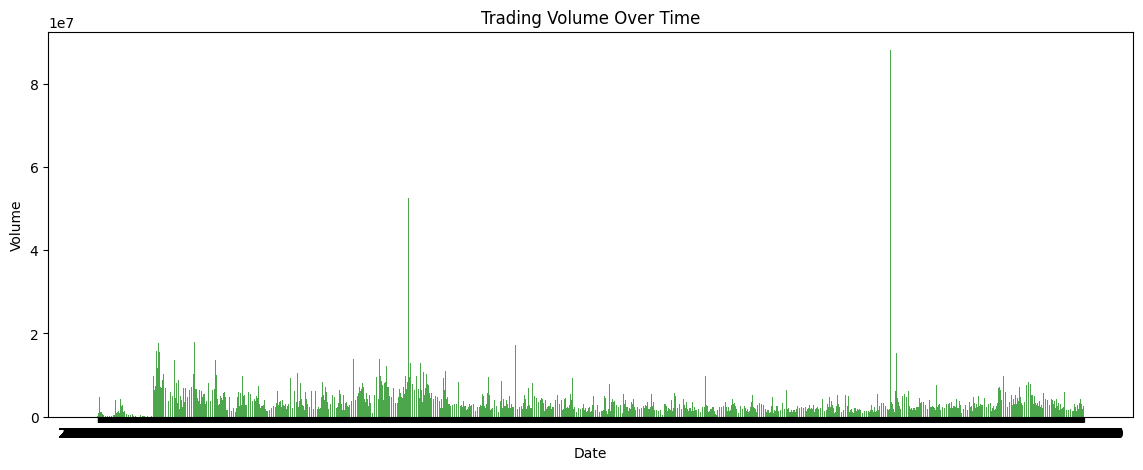

In [12]:
plt.figure(figsize=(14, 5))
plt.bar(stock_history['Date'], stock_history['Volume'], color='green', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [13]:
# Let's continue with our EDA of the TCS stock data
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure proper date formatting for analysis
stock_history['Date'] = pd.to_datetime(stock_history['Date'])
stock_history = stock_history.sort_values('Date')
stock_action['Date'] = pd.to_datetime(stock_action['Date'])

# Create a directory for saving analysis outputs
os.makedirs('tcs_analysis_outputs', exist_ok=True)


In [40]:
# 1. Time Series Analysis of Stock Prices
print("\n=== Time Series Analysis ===")
# Calculate daily returns
stock_history['Daily_Return'] = stock_history['Close'].pct_change() * 100
stock_history['Log_Return'] = np.log(stock_history['Close'].shift(1) / stock_history['Close'])
stock_history['Price_Range'] = stock_history['High'] - stock_history['Low']
stock_history['Gap_Up_Down'] = stock_history['Open'] - stock_history['Close'].shift(1)

# Create yearly and monthly aggregations
stock_history['Year'] = stock_history['Date'].dt.year
stock_history['Month'] = stock_history['Date'].dt.month
stock_history['Month_Name'] = stock_history['Date'].dt.month_name()
stock_history['Quarter'] = stock_history['Date'].dt.quarter
stock_history['Day_of_Week'] = stock_history['Date'].dt.day_name()

# Year-Month pivot table for heatmap visualization
stock_history['YearMonth'] = stock_history['Date'].dt.strftime('%Y-%m')
monthly_returns = stock_history.groupby('YearMonth')['Daily_Return'].mean().reset_index()
monthly_returns['Year'] = monthly_returns['YearMonth'].str.split('-').str[0].astype(int)
monthly_returns['Month'] = monthly_returns['YearMonth'].str.split('-').str[1].astype(int)
monthly_return_pivot = monthly_returns.pivot_table(index='Year', columns='Month', values='Daily_Return')



# Calculate volatility (rolling standard deviation of returns)
stock_history['Volatility_30d'] = stock_history['Daily_Return'].rolling(window=30).std()

# Year-wise analysis
yearly_data = stock_history.groupby('Year').agg({
    'Open': 'first', 
    'High': 'max', 
    'Low': 'min', 
    'Close': 'last',
    'Volume': 'mean',
    'Daily_Return': ['mean', 'std', 'min', 'max']
}).reset_index()

print("\nYearly Analysis of TCS Stock:")
print(yearly_data.head())

# Create a comprehensive visualization of TCS stock prices and volume over time
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.05,
                    subplot_titles=('Price History', 'Volume', 'Daily Returns'),
                    row_heights=[0.5, 0.25, 0.25])

fig.add_trace(go.Candlestick(x=stock_history['Date'],
                            open=stock_history['Open'],
                            high=stock_history['High'],
                            low=stock_history['Low'],
                            close=stock_history['Close'],
                            name='Candlestick'),
                row=1, col=1)

fig.add_trace(go.Bar(x=stock_history['Date'], 
                    y=stock_history['Volume'], 
                    name='Volume',
                    marker_color='rgba(0, 128, 0, 0.7)'),
                row=2, col=1)

fig.add_trace(go.Scatter(x=stock_history['Date'], 
                        y=stock_history['Daily_Return'], 
                        mode='lines', 
                        name='Daily Return',
                        line=dict(color='purple', width=1)),
                row=3, col=1)

# Add moving averages
for window in [20, 50, 200]:
    stock_history[f'MA_{window}'] = stock_history['Close'].rolling(window=window).mean()
    fig.add_trace(go.Scatter(x=stock_history['Date'], 
                            y=stock_history[f'MA_{window}'], 
                            mode='lines', 
                            name=f'{window}-day MA',
                            line=dict(width=1.5)),
                row=1, col=1)

fig.update_layout(height=900, width=1200, title_text='TCS Stock Analysis (2002-2021)',
                 xaxis_rangeslider_visible=False)
fig.write_html('tcs_analysis_outputs/comprehensive_stock_analysis.html')



=== Time Series Analysis ===

Yearly Analysis of TCS Stock:
   Year        Open        High         Low       Close        Volume  \
              first         max         min        last          mean   
0  2002   28.794172   45.421928   26.126661   44.696960  1.069137e+06   
1  2003   44.603994   46.788192   24.146938   28.543207  1.121533e+06   
2  2004   88.204200  124.762250   53.182761  124.450989  5.123356e+06   
3  2005  124.450985  240.958557  102.157342  160.424515  5.981209e+06   
4  2006  160.908771  234.717070  136.974649  232.349869  4.024858e+06   

  Daily_Return                                    
          mean        std        min         max  
0     0.456054   3.022874  -6.894351   10.718465  
1    -0.645954   2.911013  -6.966408    7.630829  
2     1.437347  15.683971 -16.285300  201.888698  
3     0.319519   7.309923 -50.611112  100.000000  
4     0.170691   2.038458  -5.981721    8.986768  



Distribution Analysis


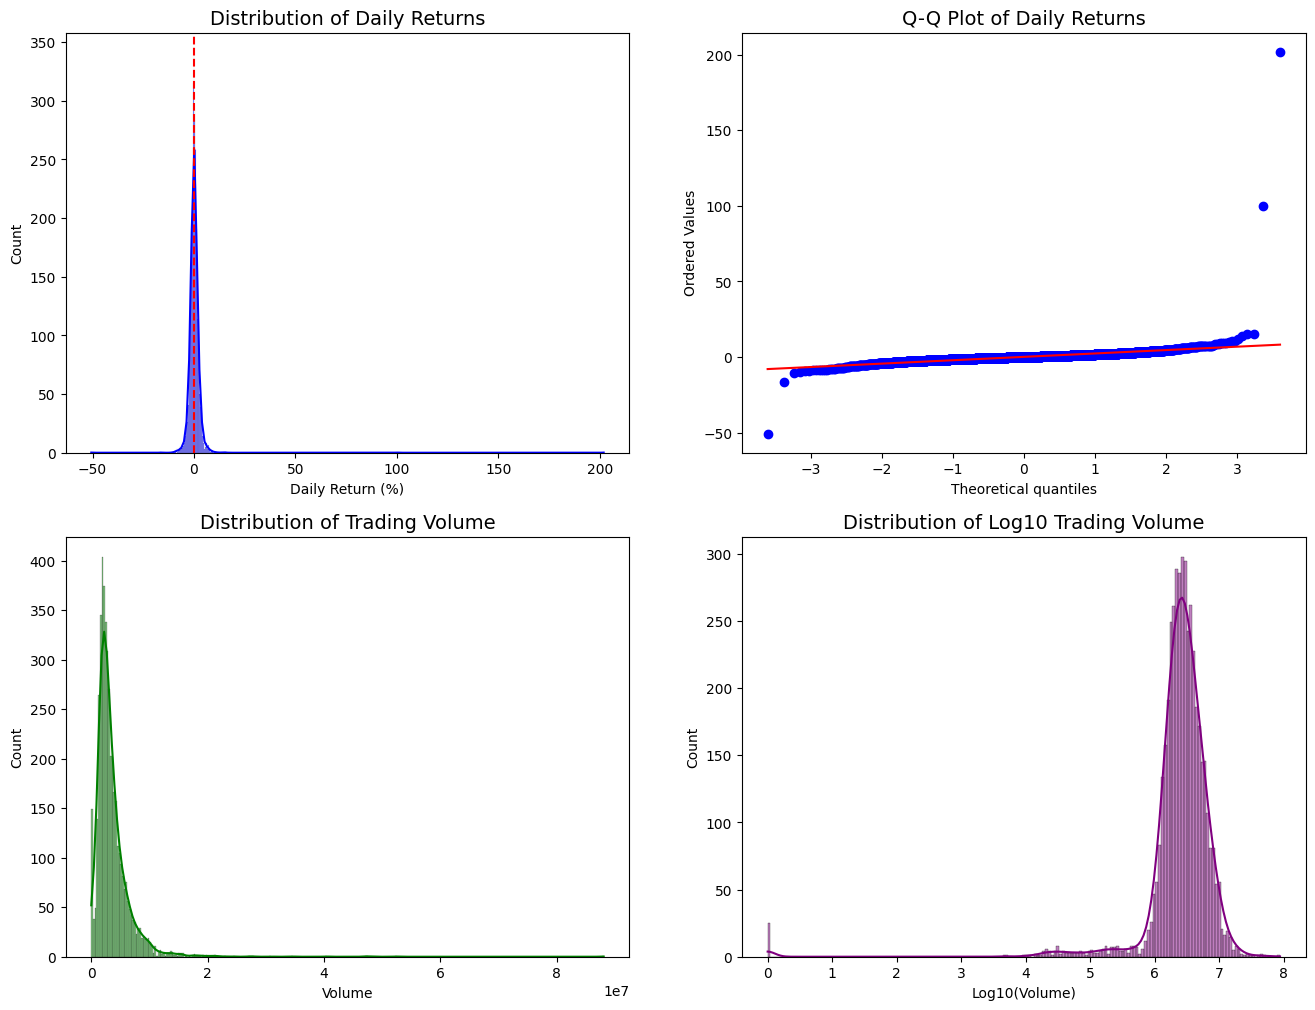

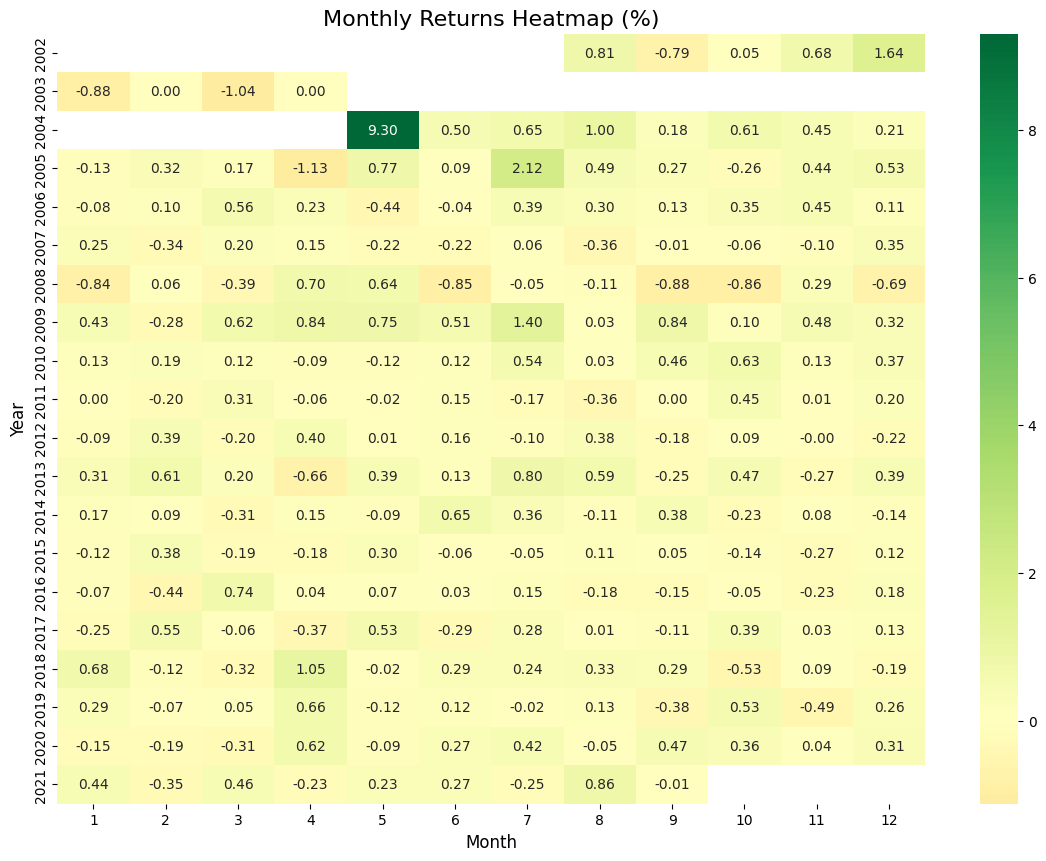

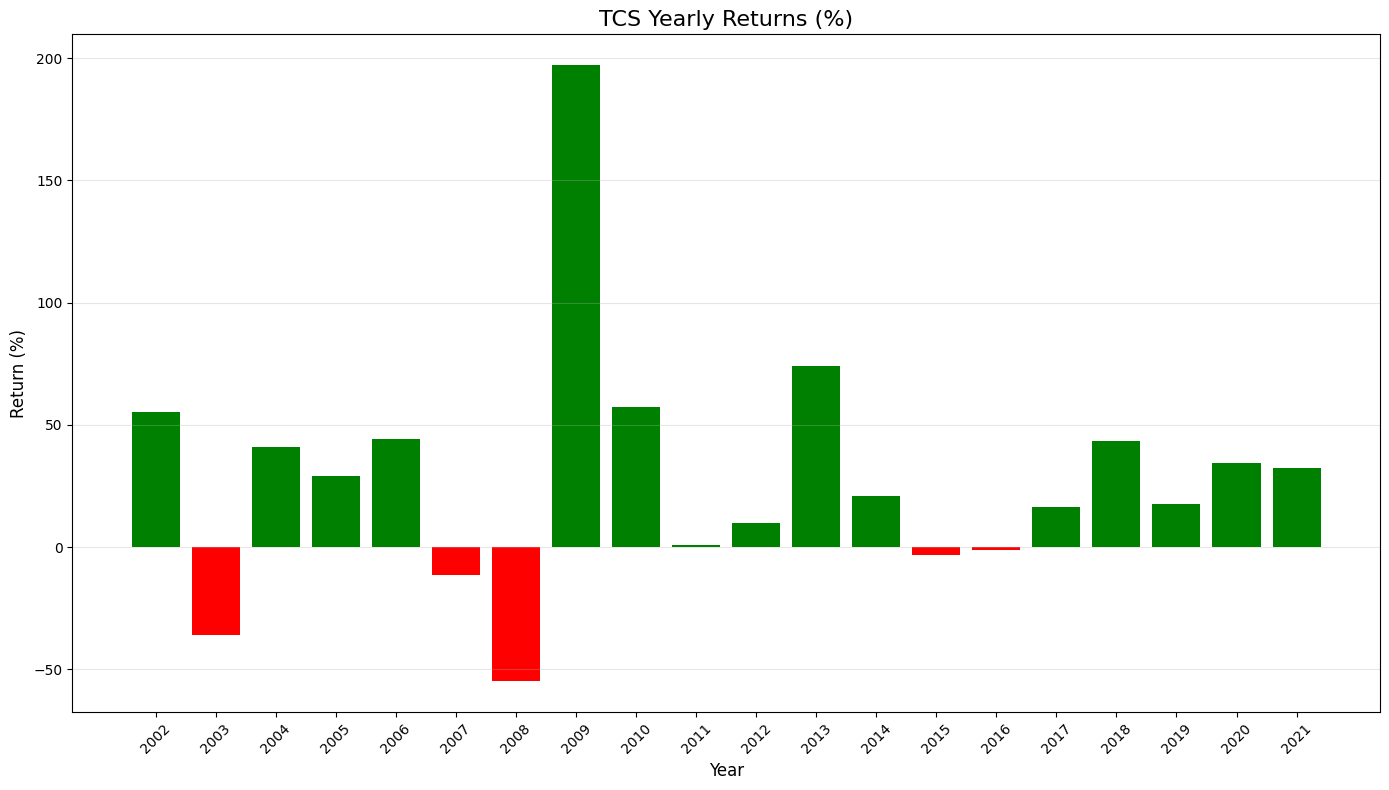

In [43]:
# 2. Distribution Analysis
print("\nDistribution Analysis")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


# heatmap of monthly returns
plt.figure(figsize=(14, 10))
sns.heatmap(monthly_return_pivot, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title('Monthly Returns Heatmap (%)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.savefig('tcs_analysis_outputs/monthly_returns_heatmap.png', dpi=300)

# Calculate yearly performance metrics
yearly_performance = stock_history.groupby('Year').agg({
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'Volume': 'mean',
    'Daily_Return': ['mean', 'std', 'min', 'max']
}).reset_index()

yearly_performance['Yearly_Return'] = (yearly_performance[('Close', 'last')] / yearly_performance[('Open', 'first')] - 1) * 100

# yearly performance metrics
plt.figure(figsize=(14, 8))
bars = plt.bar(yearly_performance['Year'].astype(str), yearly_performance['Yearly_Return'], color=np.where(yearly_performance['Yearly_Return'] >= 0, 'green', 'red'))
plt.title('TCS Yearly Returns (%)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Daily Returns Distribution
sns.histplot(stock_history['Daily_Return'].dropna(), kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Daily Returns', fontsize=14)
axes[0, 0].set_xlabel('Daily Return (%)')
axes[0, 0].axvline(x=0, color='red', linestyle='--')

# Q-Q plot of Returns
stats.probplot(stock_history['Daily_Return'].dropna(), plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Daily Returns', fontsize=14)

# Volume Distribution
sns.histplot(stock_history['Volume'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Trading Volume', fontsize=14)
axes[1, 0].set_xlabel('Volume')

# Log of Volume Distribution
sns.histplot(np.log10(stock_history['Volume'] + 1), kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of Log10 Trading Volume', fontsize=14)
axes[1, 1].set_xlabel('Log10(Volume)')

plt.tight_layout()
plt.savefig('tcs_analysis_outputs/distribution_analysis.png', dpi=300)


Correlation Analysis

Correlation with Close Price:
Close             1.000000
High              0.999914
Low               0.999901
Open              0.999787
MA_20             0.998554
MA_50             0.996965
MA_200            0.989252
Year              0.897284
Dividends         0.060179
Log_Return        0.001706
Stock Splits     -0.006635
Daily_Return     -0.007654
Month            -0.011917
Quarter          -0.012711
Volume           -0.152844
Volatility_30d   -0.188813
Name: Close, dtype: float64


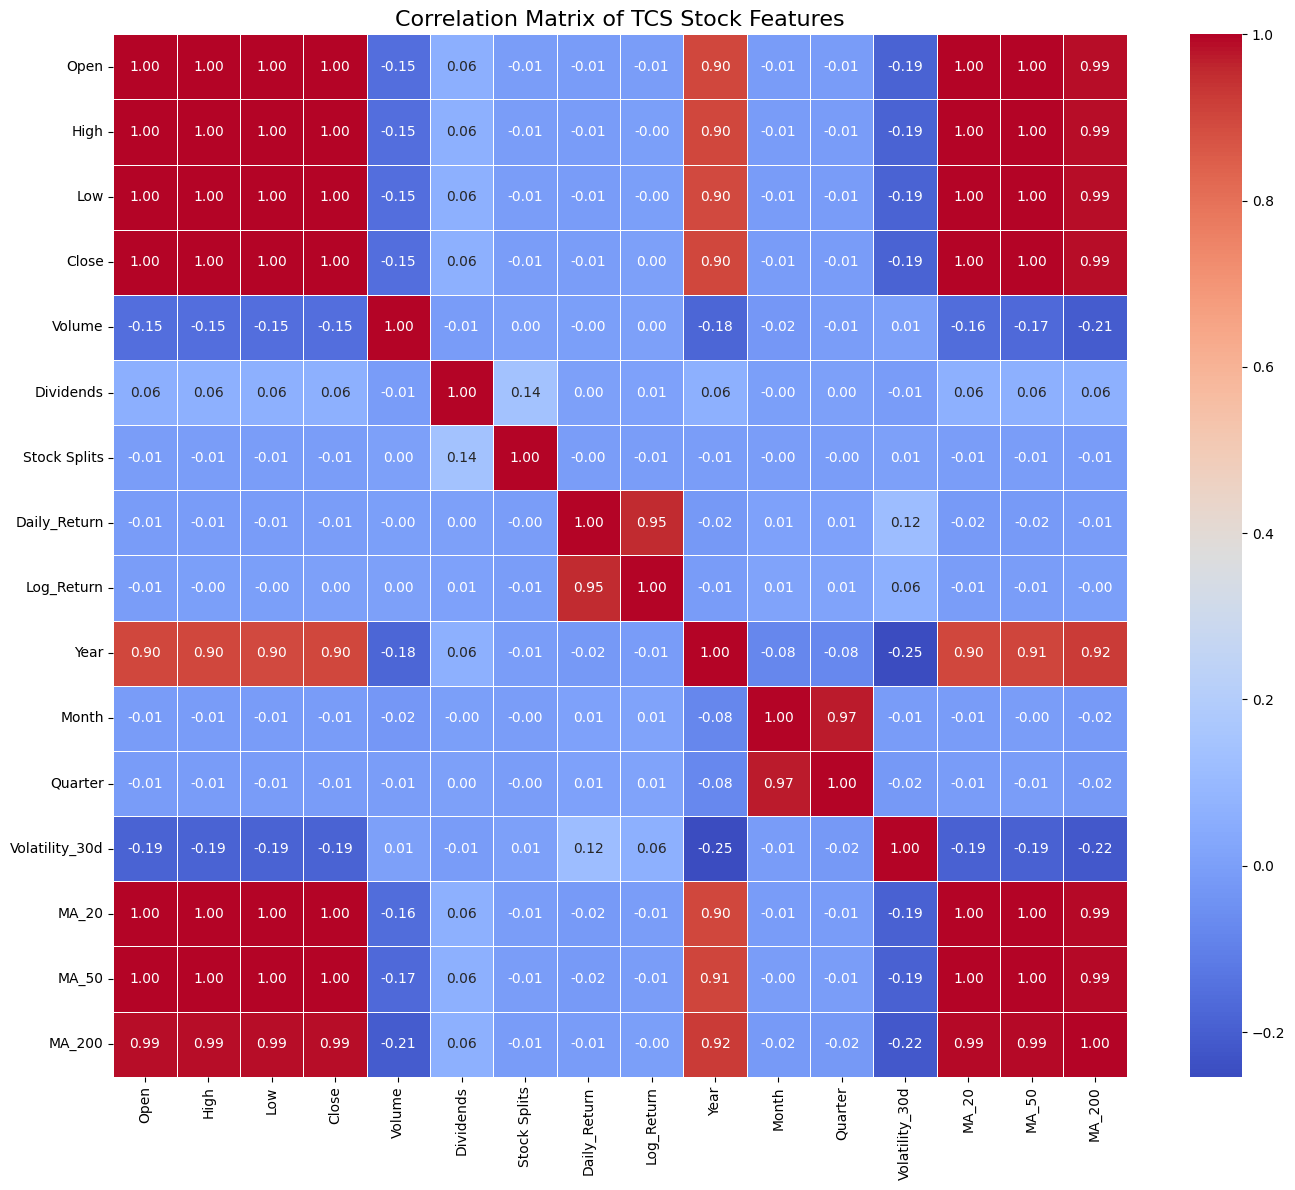

In [16]:
# 3. Correlation Analysis
print("\nCorrelation Analysis")
numeric_columns = stock_history.select_dtypes(include=[np.number]).columns
correlation_matrix = stock_history[numeric_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of TCS Stock Features', fontsize=16)
plt.tight_layout()
plt.savefig('tcs_analysis_outputs/correlation_matrix.png', dpi=300)

print("\nCorrelation with Close Price:")
close_correlation = correlation_matrix['Close'].sort_values(ascending=False)
print(close_correlation)



Seasonal Analysis


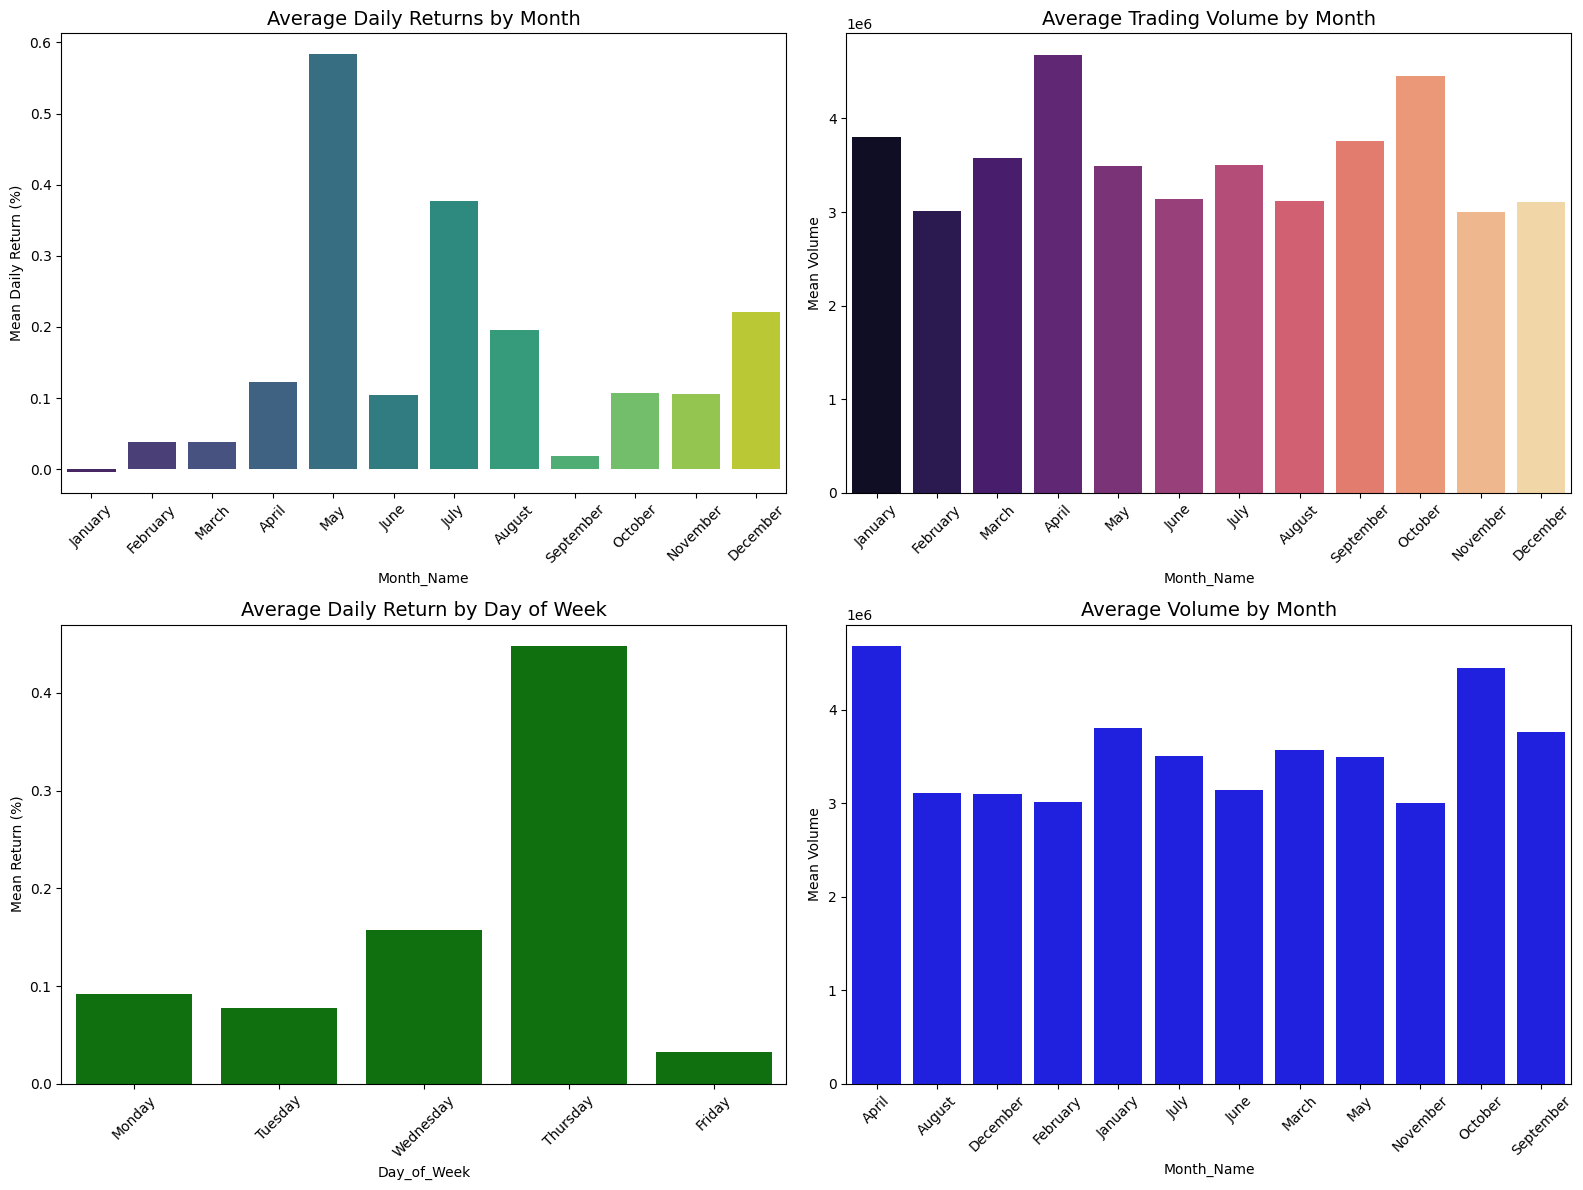

In [32]:
print("\nSeasonal Analysis")

month_stats = stock_history.groupby('Month_Name').agg({
    'Daily_Return': ['mean', 'std', 'count'],
    'Volume': 'mean',
    'Price_Range': 'mean'
}).reset_index()

# Create month and weekday level aggregations
month_analysis = stock_history.groupby('Month').agg({
    'Daily_Return': 'mean', 
    'Volume': 'mean',
    'Close': ['mean', 'median']
}).reset_index()


# Day of Week Analysis
day_of_week_stats = stock_history.groupby('Day_of_Week').agg({
    'Daily_Return': ['mean', 'std', 'count'],
    'Volume': 'mean',
    'Price_Range': 'mean'
}).reset_index()

# Sort days in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
day_of_week_stats['Day_of_Week'] = pd.Categorical(
    day_of_week_stats['Day_of_Week'], 
    categories=day_order,
    ordered=True
)
day_of_week_stats = day_of_week_stats.sort_values('Day_of_Week')
# Flatten the multi-index columns
month_analysis.columns = ['Month', 'Daily_Return_mean', 'Volume_mean', 
                         'Close_mean', 'Close_median']

month_analysis['Month_Name'] = month_analysis['Month'].apply(lambda x: calendar.month_name[x])
month_analysis = month_analysis.sort_values('Month')

weekday_analysis = stock_history.groupby('Day_of_Week').agg({
    'Daily_Return': 'mean',
    'Volume': 'mean'
}).reset_index()

# If Day_of_Week is numeric (0=Monday to 4=Friday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
weekday_analysis['Day_Name'] = pd.Categorical(
    weekday_analysis['Day_of_Week'].map(weekday_map),
    categories=weekday_order,
    ordered=True
)
weekday_analysis = weekday_analysis.sort_values('Day_Name')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly Returns
sns.barplot(x='Month_Name', y='Daily_Return_mean', data=month_analysis, 
            ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Average Daily Returns by Month', fontsize=14)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_ylabel('Mean Daily Return (%)')

# Monthly Volume
sns.barplot(x='Month_Name', y='Volume_mean', data=month_analysis, 
            ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Average Trading Volume by Month', fontsize=14)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].set_ylabel('Mean Volume')

# Weekday Returns
sns.barplot(x='Day_of_Week', y=('Daily_Return', 'mean'), data=day_of_week_stats, ax=axes[1, 0],
           palette=np.where(day_of_week_stats[('Daily_Return', 'mean')] >= 0, 'green', 'red'))
axes[1, 0].set_title('Average Daily Return by Day of Week', fontsize=14)
axes[1, 0].set_ylabel('Mean Return (%)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Weekday Volume
sns.barplot(x='Month_Name', y=('Volume', 'mean'), data=month_stats, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Average Volume by Month', fontsize=14)
axes[1, 1].set_ylabel('Mean Volume')
axes[1, 1].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('tcs_analysis_outputs/seasonal_analysis.png', dpi=300)
plt.show()


Volatility Analysis


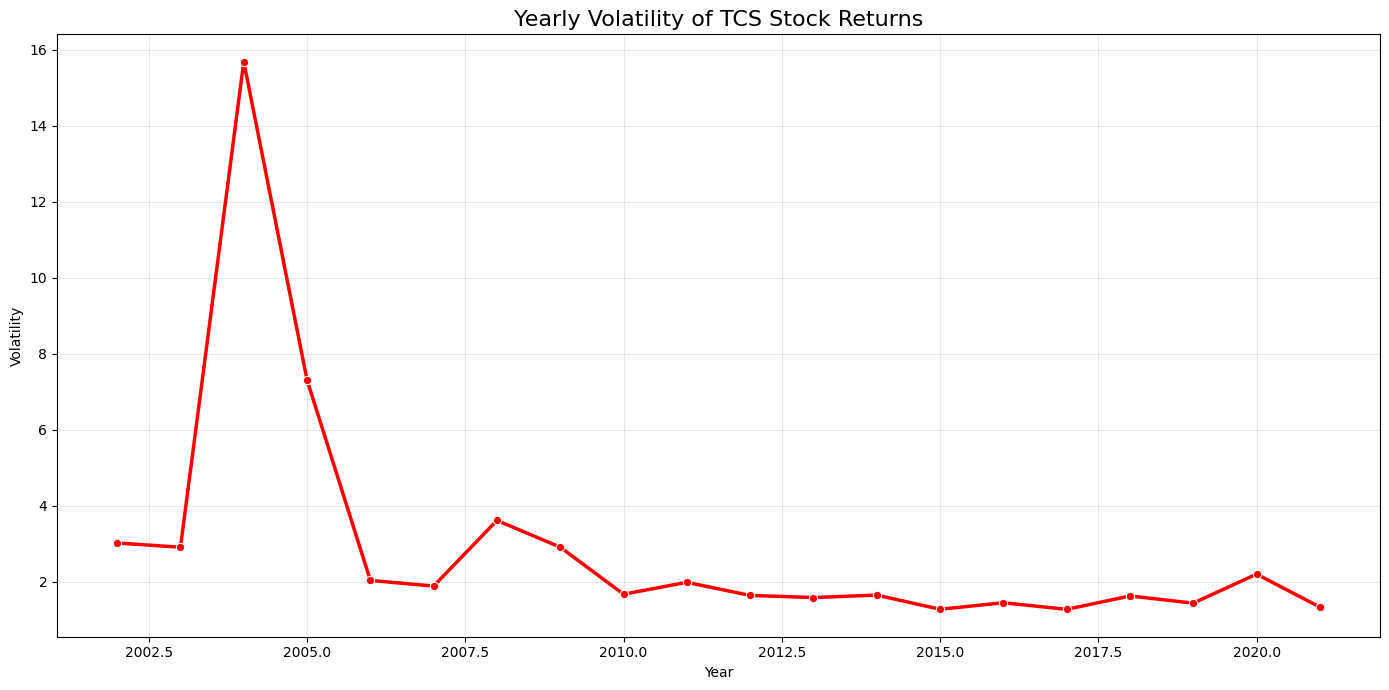

In [25]:
# 5. Volatility Analysis
print("\nVolatility Analysis")
# Calculate yearly volatility
yearly_volatility = stock_history.groupby('Year')['Daily_Return'].std().reset_index()
yearly_volatility.columns = ['Year', 'Volatility']

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Volatility', data=yearly_volatility, marker='o', color='red', linewidth=2.5)
plt.title('Yearly Volatility of TCS Stock Returns', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tcs_analysis_outputs/yearly_volatility.png', dpi=300)



=== Technical Analysis and Trading Patterns ===

Trading Pattern Analysis:
          Signal_Type  Occurrences
0   SMA_Cross_Bullish         2841
1   SMA_Cross_Bearish         1573
2  MACD_Cross_Bullish         2237
3  MACD_Cross_Bearish         2225
4        RSI_Oversold          331
5      RSI_Overbought          774


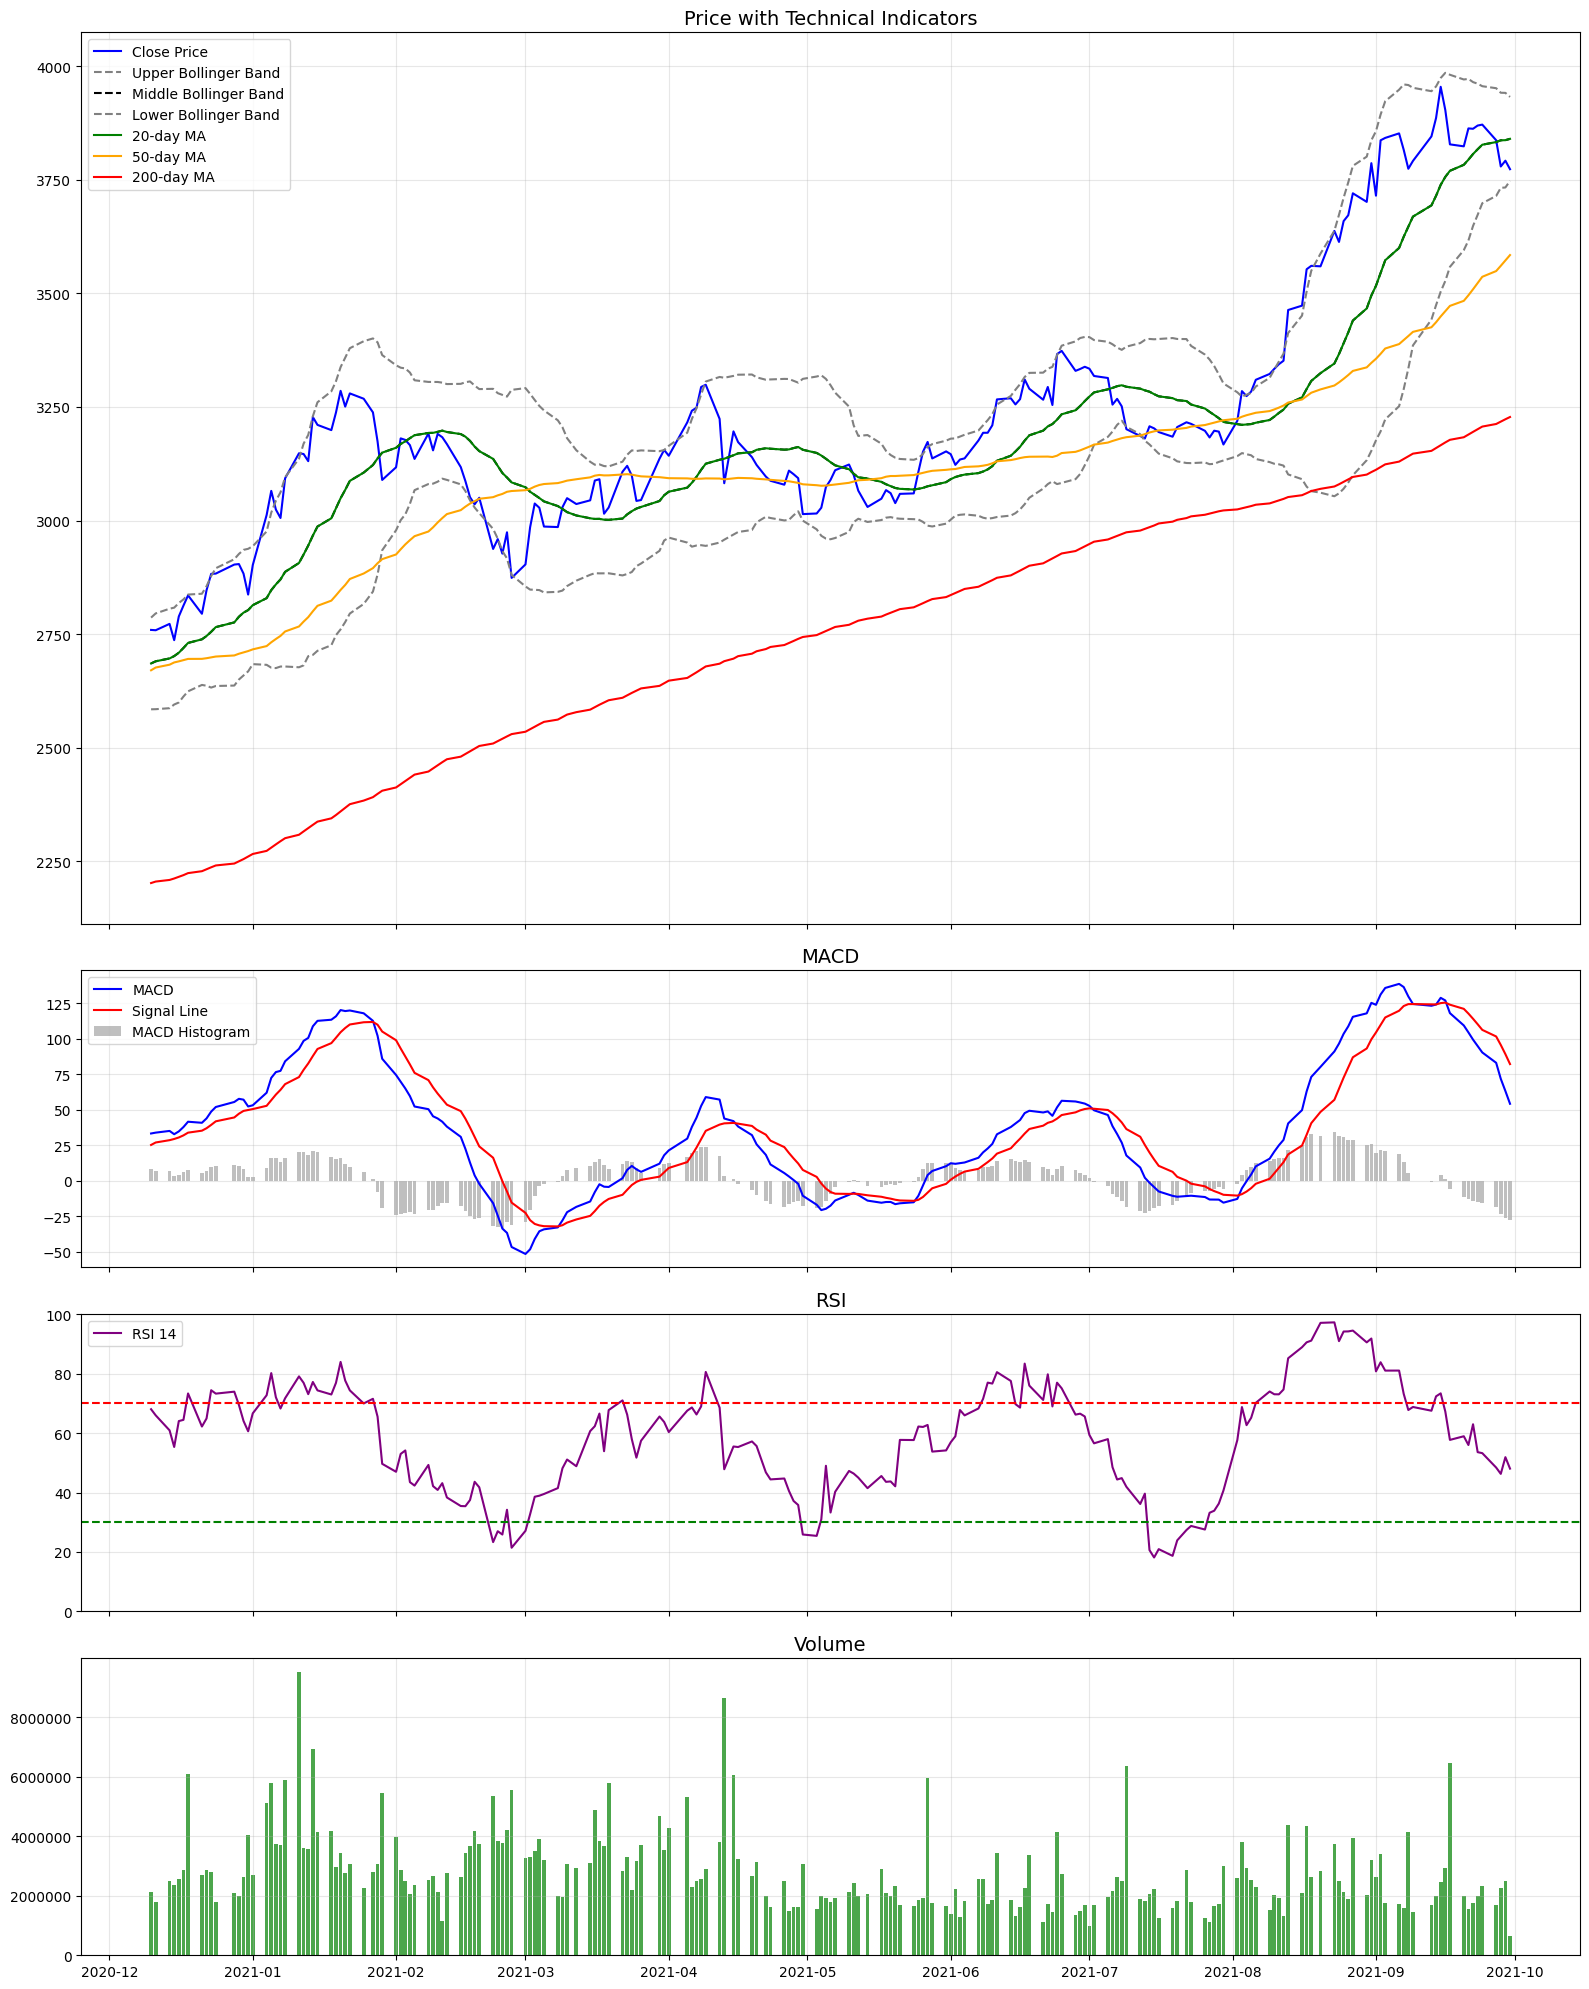

In [28]:
# =================================================
# 5. Technical Analysis and Trading Patterns
# =================================================
print("\nTechnical Analysis and Trading Patterns")

# Calculate technical indicators
# RSI - Relative Strength Index
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_history['RSI_14'] = calculate_rsi(stock_history['Close'], 14)

# MACD - Moving Average Convergence Divergence
stock_history['EMA_12'] = stock_history['Close'].ewm(span=12, adjust=False).mean()
stock_history['EMA_26'] = stock_history['Close'].ewm(span=26, adjust=False).mean()
stock_history['MACD'] = stock_history['EMA_12'] - stock_history['EMA_26']
stock_history['Signal_Line'] = stock_history['MACD'].ewm(span=9, adjust=False).mean()
stock_history['MACD_Histogram'] = stock_history['MACD'] - stock_history['Signal_Line']

# Bollinger Bands
stock_history['BB_Middle'] = stock_history['Close'].rolling(window=20).mean()
stock_history['BB_StdDev'] = stock_history['Close'].rolling(window=20).std()
stock_history['BB_Upper'] = stock_history['BB_Middle'] + (stock_history['BB_StdDev'] * 2)
stock_history['BB_Lower'] = stock_history['BB_Middle'] - (stock_history['BB_StdDev'] * 2)
stock_history['BB_Width'] = (stock_history['BB_Upper'] - stock_history['BB_Lower']) / stock_history['BB_Middle']

# Momentum indicators
stock_history['Momentum_14'] = stock_history['Close'] - stock_history['Close'].shift(14)
stock_history['ROC_14'] = (stock_history['Close'] / stock_history['Close'].shift(14) - 1) * 100

# Identifying potential trading signals
stock_history['SMA_Cross'] = np.where(stock_history['MA_20'] > stock_history['MA_50'], 1, 
                                     np.where(stock_history['MA_20'] < stock_history['MA_50'], -1, 0))
stock_history['MACD_Signal'] = np.where(stock_history['MACD'] > stock_history['Signal_Line'], 1,
                                       np.where(stock_history['MACD'] < stock_history['Signal_Line'], -1, 0))
stock_history['RSI_Signal'] = np.where(stock_history['RSI_14'] < 30, 1, 
                                      np.where(stock_history['RSI_14'] > 70, -1, 0))

# Analyze pattern frequencies and effectiveness
pattern_analysis = pd.DataFrame({
    'Signal_Type': ['SMA_Cross_Bullish', 'SMA_Cross_Bearish', 'MACD_Cross_Bullish', 'MACD_Cross_Bearish', 
                    'RSI_Oversold', 'RSI_Overbought'],
    'Occurrences': [
        (stock_history['SMA_Cross'] == 1).sum(),
        (stock_history['SMA_Cross'] == -1).sum(),
        (stock_history['MACD_Signal'] == 1).sum(),
        (stock_history['MACD_Signal'] == -1).sum(),
        (stock_history['RSI_Signal'] == 1).sum(),
        (stock_history['RSI_Signal'] == -1).sum()
    ]
})

print("\nTrading Pattern Analysis:")
print(pattern_analysis)

# Create a visualization of technical indicators for a recent period (last 200 days)
recent_period = stock_history.tail(200).copy()

fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})

# Price and Bollinger Bands
axes[0].plot(recent_period['Date'], recent_period['Close'], label='Close Price', color='blue')
axes[0].plot(recent_period['Date'], recent_period['BB_Upper'], '--', label='Upper Bollinger Band', color='gray')
axes[0].plot(recent_period['Date'], recent_period['BB_Middle'], '--', label='Middle Bollinger Band', color='black')
axes[0].plot(recent_period['Date'], recent_period['BB_Lower'], '--', label='Lower Bollinger Band', color='gray')
axes[0].plot(recent_period['Date'], recent_period['MA_20'], label='20-day MA', color='green')
axes[0].plot(recent_period['Date'], recent_period['MA_50'], label='50-day MA', color='orange')
axes[0].plot(recent_period['Date'], recent_period['MA_200'], label='200-day MA', color='red')
axes[0].set_title('Price with Technical Indicators', fontsize=14)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(recent_period['Date'], recent_period['MACD'], label='MACD', color='blue')
axes[1].plot(recent_period['Date'], recent_period['Signal_Line'], label='Signal Line', color='red')
axes[1].bar(recent_period['Date'], recent_period['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
axes[1].set_title('MACD', fontsize=14)
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# RSI
axes[2].plot(recent_period['Date'], recent_period['RSI_14'], label='RSI 14', color='purple')
axes[2].axhline(y=70, color='red', linestyle='--')
axes[2].axhline(y=30, color='green', linestyle='--')
axes[2].set_title('RSI', fontsize=14)
axes[2].set_ylim(0, 100)
axes[2].legend(loc='upper left')
axes[2].grid(True, alpha=0.3)

# Volume
axes[3].bar(recent_period['Date'], recent_period['Volume'], label='Volume', color='green', alpha=0.7)
axes[3].set_title('Volume', fontsize=14)
axes[3].ticklabel_format(style='plain', axis='y')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tcs_analysis_outputs/technical_analysis.png', dpi=300)



Dividend Impact Analysis

Average Returns After Dividend Payment:
    Days_From_Dividend  Normalized_Close
11                   1        100.110202
12                   2        100.239851
13                   3        100.253726
14                   4        100.225830
15                   5        100.308098


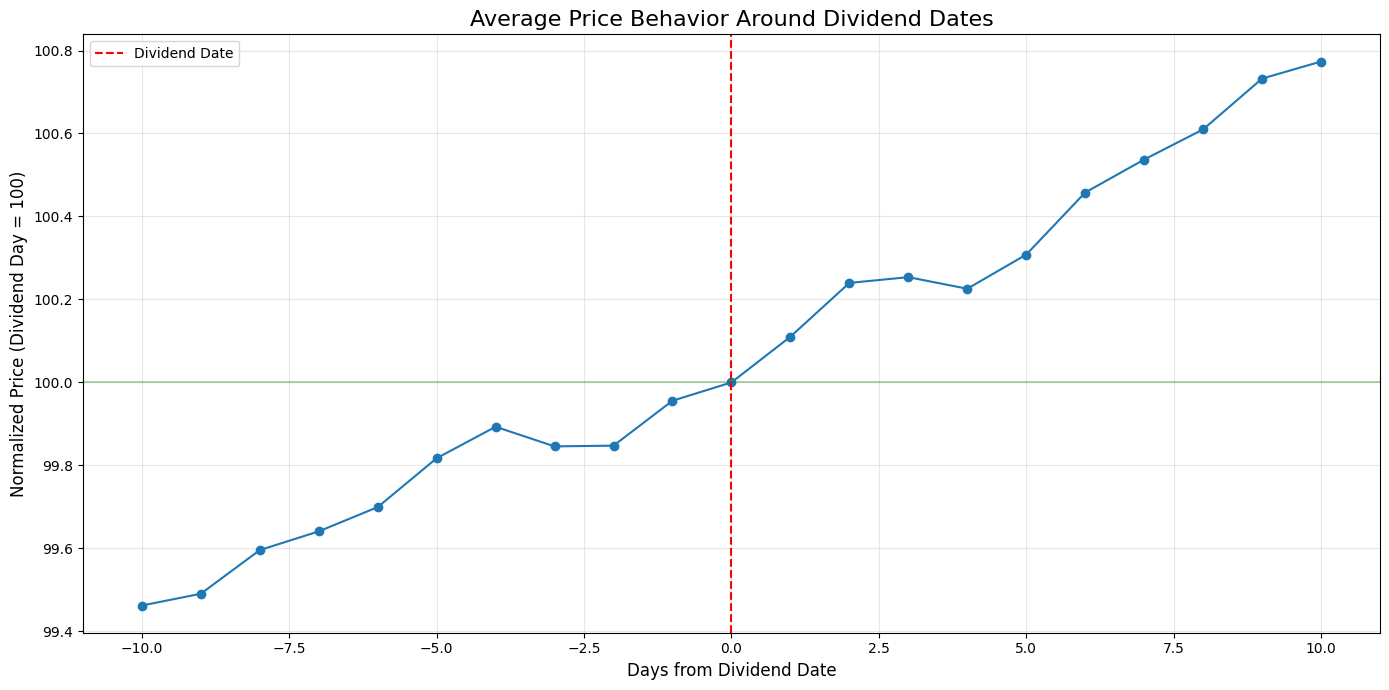

In [34]:
# =================================================
# 6. Analyze dividend impact on stock prices
# =================================================
print("\nDividend Impact Analysis")

# Merge stock_history with stock_action for detailed dividend analysis
merged_df = pd.merge_asof(
    stock_history.sort_values('Date'),
    stock_action.sort_values('Date')[['Date', 'Dividends']].rename(columns={'Dividends': 'Dividend_Amount'}),
    on='Date',
    direction='backward'
)

# Mark dividend dates
merged_df['Has_Dividend'] = merged_df['Dividend_Amount'].notna()
merged_df['Days_Since_Dividend'] = merged_df.groupby(merged_df['Has_Dividend'].cumsum())['Has_Dividend'].cumcount()

# Analyze price behavior around dividend dates
dividend_dates = merged_df[merged_df['Has_Dividend']]['Date'].tolist()

# Window for analysis (days before and after dividend)
window_size = 10
price_windows = []

for div_date in dividend_dates:
    # Get data within window around dividend date
    mask = (merged_df['Date'] >= (div_date - pd.Timedelta(days=window_size))) & \
           (merged_df['Date'] <= (div_date + pd.Timedelta(days=window_size)))
    window_data = merged_df[mask].copy()
    
    if len(window_data) > 0:
        # Calculate days from dividend
        window_data['Days_From_Dividend'] = (window_data['Date'] - div_date).dt.days
        window_data['Dividend_Date'] = div_date
        window_data['Dividend_Amount'] = window_data.loc[window_data['Date'] == div_date, 'Dividend_Amount'].iloc[0] \
                                        if len(window_data.loc[window_data['Date'] == div_date]) > 0 else np.nan
        price_windows.append(window_data)

if price_windows:
    dividend_analysis = pd.concat(price_windows)
    
    # Normalize prices to dividend day (day 0)
    dividend_analysis['Normalized_Close'] = 100
    for div_date in dividend_dates:
        div_data = dividend_analysis[dividend_analysis['Dividend_Date'] == div_date]
        if len(div_data) > 0 and div_date in div_data['Date'].values:
            div_day_price = div_data.loc[div_data['Date'] == div_date, 'Close'].iloc[0]
            dividend_analysis.loc[dividend_analysis['Dividend_Date'] == div_date, 'Normalized_Close'] = \
                (dividend_analysis.loc[dividend_analysis['Dividend_Date'] == div_date, 'Close'] / div_day_price) * 100

    # Average price behavior around dividend dates
    avg_behavior = dividend_analysis.groupby('Days_From_Dividend')['Normalized_Close'].mean().reset_index()

    plt.figure(figsize=(14, 7))
    plt.plot(avg_behavior['Days_From_Dividend'], avg_behavior['Normalized_Close'], marker='o')
    plt.axvline(x=0, color='red', linestyle='--', label='Dividend Date')
    plt.axhline(y=100, color='green', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.title('Average Price Behavior Around Dividend Dates', fontsize=16)
    plt.xlabel('Days from Dividend Date', fontsize=12)
    plt.ylabel('Normalized Price (Dividend Day = 100)', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig('tcs_analysis_outputs/dividend_impact.png', dpi=300)
    # Analyze average returns after dividends
    print("\nAverage Returns After Dividend Payment:")
    post_div_returns = avg_behavior[avg_behavior['Days_From_Dividend'] > 0].head(5)
    print(post_div_returns)



=== Market Efficiency Analysis ===

Runs Test for Market Randomness:
Number of positive returns: 2284
Number of negative returns: 2148
Number of runs: 2157
Expected number of runs: 2214.91
Z-statistic: -1964.5296
P-value: 0.000000
Conclusion: Returns show non-random behavior (reject null hypothesis of randomness)

Comprehensive EDA completed successfully. All outputs saved to tcs_analysis_outputs directory.


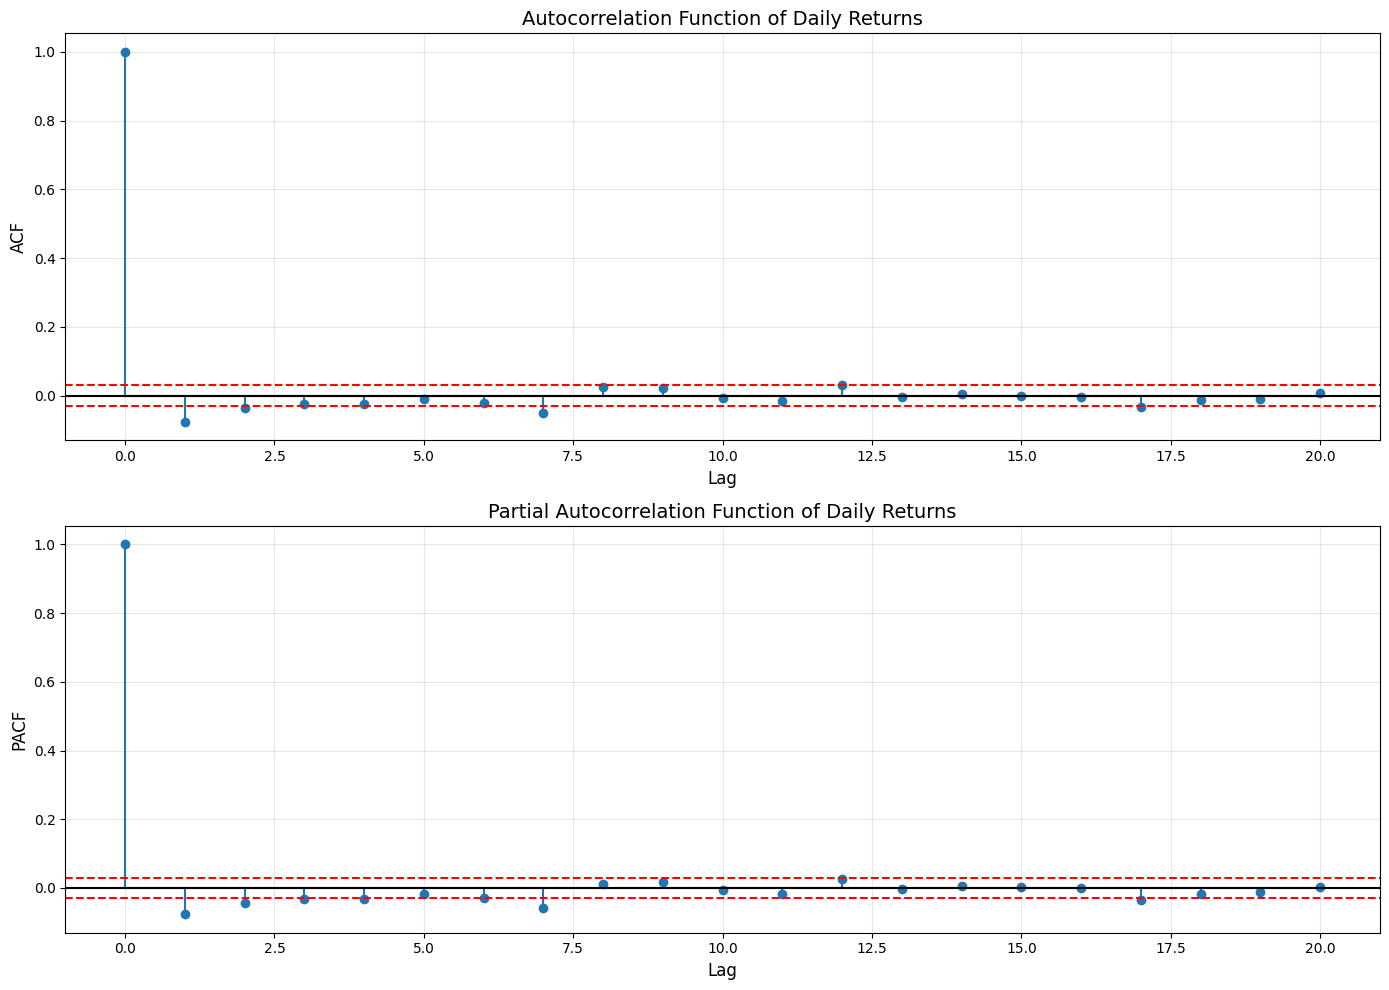

In [36]:
# =================================================
# 7. Market Efficiency Analysis
# =================================================
print("\nMarket Efficiency Analysis")

# Calculate autocorrelation of returns
from statsmodels.tsa.stattools import acf, pacf

returns_acf = acf(stock_history['Daily_Return'].dropna(), nlags=20)
returns_pacf = pacf(stock_history['Daily_Return'].dropna(), nlags=20)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot ACF
axes[0].stem(range(len(returns_acf)), returns_acf)
axes[0].set_title('Autocorrelation Function of Daily Returns', fontsize=14)
axes[0].set_xlabel('Lag', fontsize=12)
axes[0].set_ylabel('ACF', fontsize=12)
axes[0].axhline(y=0, linestyle='-', color='black')
axes[0].axhline(y=1.96/np.sqrt(len(stock_history['Daily_Return'].dropna())), linestyle='--', color='red')
axes[0].axhline(y=-1.96/np.sqrt(len(stock_history['Daily_Return'].dropna())), linestyle='--', color='red')
axes[0].grid(True, alpha=0.3)

# Plot PACF
axes[1].stem(range(len(returns_pacf)), returns_pacf)
axes[1].set_title('Partial Autocorrelation Function of Daily Returns', fontsize=14)
axes[1].set_xlabel('Lag', fontsize=12)
axes[1].set_ylabel('PACF', fontsize=12)
axes[1].axhline(y=0, linestyle='-', color='black')
axes[1].axhline(y=1.96/np.sqrt(len(stock_history['Daily_Return'].dropna())), linestyle='--', color='red')
axes[1].axhline(y=-1.96/np.sqrt(len(stock_history['Daily_Return'].dropna())), linestyle='--', color='red')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tcs_analysis_outputs/autocorrelation_analysis.png', dpi=300)

# Runs test for randomness
def runs_test(returns):
    # Determine the sign of returns
    returns = returns.dropna()
    signs = np.sign(returns)
    signs = signs[signs != 0]  # Remove zeros
    signs = signs.values  # Convert to numpy array to avoid Series comparison issues
    
    # Count runs
    n_plus = sum(signs > 0)
    n_minus = sum(signs < 0)
    n_runs = 1 + sum(signs[1:] != signs[:-1])
    
    # Calculate expected runs and standard deviation
    n = len(signs)
    expected_runs = (2 * n_plus * n_minus) / n + 1
    std_runs = np.sqrt((2 * n_plus * n_minus * (2 * n_plus * n_minus - n)) / (n**2 * (n - 1)))
    
    # Z-statistic
    z = (n_runs - expected_runs) / std_runs
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return {
        'n_plus': n_plus,
        'n_minus': n_minus,
        'n_runs': n_runs,
        'expected_runs': expected_runs,
        'z_statistic': z,
        'p_value': p_value
    }

runs_result = runs_test(stock_history['Daily_Return'])
print("\nRuns Test for Market Randomness:")
print(f"Number of positive returns: {runs_result['n_plus']}")
print(f"Number of negative returns: {runs_result['n_minus']}")
print(f"Number of runs: {runs_result['n_runs']}")
print(f"Expected number of runs: {runs_result['expected_runs']:.2f}")
print(f"Z-statistic: {runs_result['z_statistic']:.4f}")
print(f"P-value: {runs_result['p_value']:.6f}")

if runs_result['p_value'] < 0.05:
    print("Conclusion: Returns show non-random behavior (reject null hypothesis of randomness)")
else:
    print("Conclusion: Returns show random behavior (cannot reject null hypothesis of randomness)")

# Save processed data for future use in modeling
stock_history.to_csv('tcs_analysis_outputs/processed_stock_data.csv', index=False)

print("\nComprehensive EDA completed successfully. All outputs saved to tcs_analysis_outputs directory.")